<h1>Polynomial Regression</h1>

Polynomial regression is a form of regression analysis in which the relationship between the independent variable $x$ and the dependent variable $y$ is modelled as an $n^{th}$ degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of $y$, denoted $E(y |x)$. Although polynomial regression fits a nonlinear model to the data, as a statistical estimation problem it is linear, in the sense that the regression function $E(y | x)$ is linear in the unknown parameters that are estimated from the data. For this reason, polynomial regression is considered to be a special case of multiple linear regression.

<img src="https://www.researchgate.net/profile/Enrico_Camporeale/publication/331733728/figure/fig2/AS:736325191876612@1552565014850/Example-of-overfitting-with-polynomial-regression-Increasing-the-order-of-the-polynomial.png" height="500" width="500">

The polynomial regression model

<img src ="https://wikimedia.org/api/rest_v1/media/math/render/svg/4adbc890e368ce1d9ab28a7b02cb8f454e160686">

Writing this equation in a <b><font color = "orange">matrix notation</font></b> we have:

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e">

<i>Source: </i> Wikipedia

This is what proves that linear regression is not for linear independent variables $X$, but for linear coefficients $\beta$

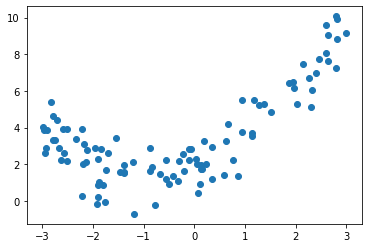

In [93]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.scatter(X,y)
plt.show()

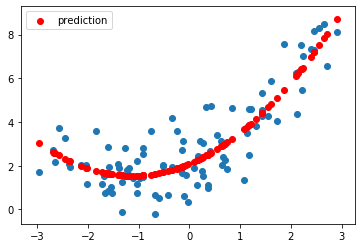

In [69]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
y_pred = lin_reg.predict(X_poly)
plt.scatter(X,y)
plt.scatter(X, y_pred, color="red",label="prediction")
plt.legend()
plt.show()

In [70]:
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ",lin_reg.coef_)

Intercept:  [2.08946939]
Coefficients:  [[0.98688941 0.44085617]]


Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features $a^2, a^3, b^2, and b^3$, but also the combinations $ab, a^2b$, and $ab^2$.

🛑<font color ="red">Attention:</font> combinatorial explosion of the number of features!

<h1>Learning Curves</h1>
Learning curves are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, simply train the model several times on different sized subsets of the training set.

<function matplotlib.pyplot.show(*args, **kw)>

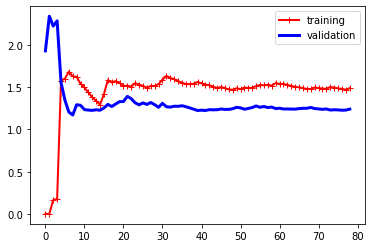

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="training")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="validation")
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.legend()
plt.show

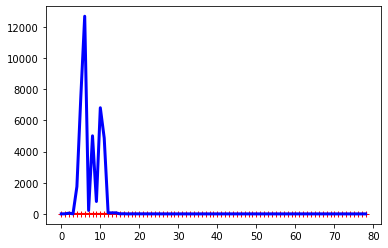

In [72]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
("lin_reg", LinearRegression()),
])
plot_learning_curves(polynomial_regression, X, y)

<h1>Regularized Linear Models</h1>

The idea of regularization is that one starts from a large function space and controls the solution’s complexity by a regularization (or penalization) term. This is a principled and flexible way to balance approximation and estimation errors. Here, the notion of complexity depends on the function space and the form of regularizer, and may have smoothness, sparsity, or other well-defined interpretations.
<i>Source:</i>http://chercheurs.lille.inria.fr/~ghavamza/PUBLICATIONS/msrl09-regrl.pdf

💡<b><font color = "red">Important: </font></b> scale the data (e.g., using a StandardScaler) before performing Ridge Regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

<h2>Ridge Regression</h2>

Ridge Regression (also called Tikhonov regularization) is a regularized version of Linear Regression: a regularization term equal to $\lambda{Σ_{i = 1} ^n }\beta_i^2$ is added to the cost function.
This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. <font color="blue">Note that the regularization term should only be added to the cost function during training.</font> Once the model is trained, you want to evaluate the model’s performance using the unregularized performance measure.

The hyperparameter $\lambda$ controls how much you want to regularize the model.

$J(\beta) = MSE(\beta) + \lambdaΣ_{i = 1}^n \beta_i^2$, for ${\beta \geq 0}$

Another way of writing it would be:
$J(\beta)=\lVert{Y-βX}\rVert^2 + \lambda \lVert{β}\rVert^2$, for ${\lambda \geq 0}$

The solution for the problem is:

$\hatθ = (X^TX + αI_{p+1})^{−1} X^T y$

In practice: we take a grid for $\lambda$ and for each value we compute an estimator $\hat\beta_\lambda$ and the cross-validation error associated to it, and we select the $\lambda$ associated to the smallest error.

In [73]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [74]:
ridge_reg.predict([[1.5]])

array([[4.57105289]])

In [75]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.54865933])

<h2>Lasso Regression</h2>

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the ℓ1 norm of the weight vector instead of half the square of the ℓ2 norm

The hyperparameter $\lambda$ controls how much you want to regularize the model.

$J(\beta) = MSE(\beta) + \lambdaΣ_{i = 1}^n |\beta_i|$, for ${\beta \geq 0}$

In [76]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.50684233])

<h2>Elastic Net</h2>
Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression.

Elastic Net cost function

$J(\beta) = MSE(\beta) + r\lambdaΣ_{i = 1}^n \beta_i + \frac{1 − r}{2} \lambdaΣ_{i = 1}^n \beta_i^2$

In [77]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.50822311])

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer
Lasso or Elastic Net since they tend to reduce the useless features’ weights down to zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<h2>Early Stopping</h2>

A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure 4-20 shows a complex model (in this case a high-degree Polynomial Regression model) being trained using Batch Gradient Descent.<font color ="blue"> As the epochs go by, the algorithm learns and its prediction error (RMSE) on the training set naturally goes down, and so does its prediction error on the validation set.</font> <font color ="red">However, after a while the validation error stops decreasing and actually starts to go back up.</font> This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. It is such a simple and efficient regularization technique that Geoffrey Hinton called it a “beautiful free lunch.”


In [132]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
                               
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

sgd_reg.intercept_
sgd_reg.coef_
x_=(1.5-np.mean(X))/np.var(X)
y_pred=sgd_reg.intercept_+sgd_reg.coef_[0]*x_+sgd_reg.coef_[1]*x_**2+sgd_reg.coef_[2]*x_**3+sgd_reg.coef_[3]*x_**4+sgd_reg.coef_[4]*x_**5+sgd_reg.coef_[5]*x_**5
print(y_pred)

[4.00841245]


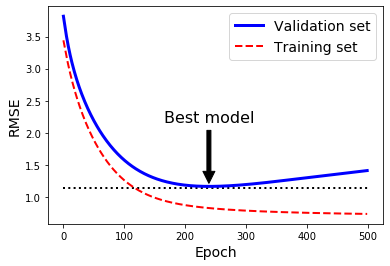

In [119]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()